In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [106]:
bikesharing=pd.read_csv("../input/day.csv")

In [107]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [108]:
#checking number of rows and columns in dataset
bikesharing.shape

(730, 16)

In [109]:
#check various statistic parametres
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [110]:
#splitting the dataframe to numeric and categorical variables
bikesharing_numeric=bikesharing[['temp','atemp','hum','windspeed','casual','registered','cnt']]
bikesharing_categorical=bikesharing[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [111]:
#Checking all numeric columns if there are any null values in each
for col in bikesharing_numeric.columns:
    print(col,len(bikesharing_numeric[bikesharing_numeric[col].isnull()==True]))

    #using predefined functions in python to find the null values.
bikesharing_numeric.isna().sum()

temp 0
atemp 0
hum 0
windspeed 0
casual 0
registered 0
cnt 0


temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [112]:
#checking null values and nan's in the categorical variables
bikesharing_categorical.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
dtype: int64

#As per above values there are no null values in the dataset to be imputed

# Exploratory Data Analysis

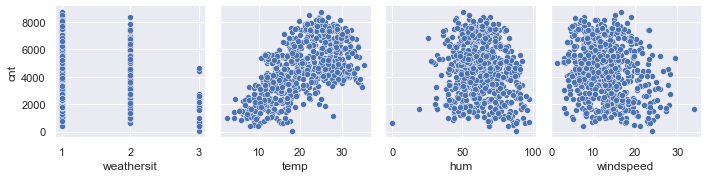

In [113]:
# To know relationship between different variable darawing pair plots using seaborn

#with numeric variables
plt.rcParams['figure.figsize']=20,20
sns.pairplot(data=bikesharing,x_vars=['weathersit','temp','hum','windspeed'],y_vars='cnt')
#plt.show()


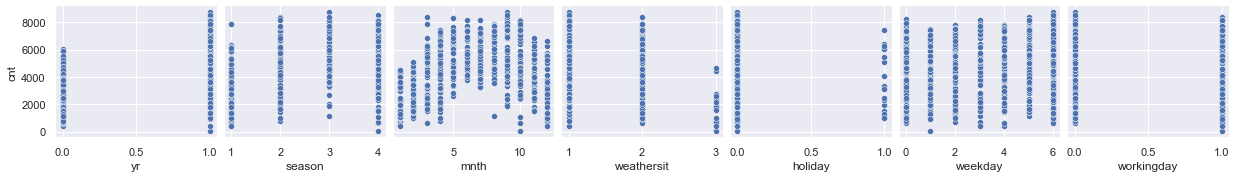

In [114]:
#with categorical variables

sns.pairplot(data=bikesharing,x_vars=['yr','season','mnth','weathersit','holiday','weekday','workingday'],y_vars='cnt')


In [115]:
bikesharing.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


<AxesSubplot:>

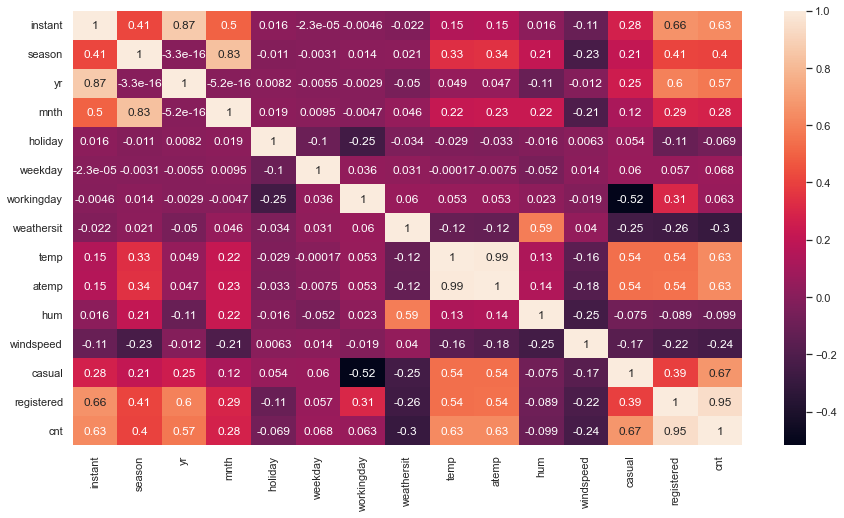

In [116]:
#displaying heatmap by inputting the correlation function
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(bikesharing.corr(),annot=True)

In [117]:
#By looking at the heat map theere is high correlation between the  (temp-atemp)
bikesharing.drop(['temp'],axis=1,inplace=True)
# There is a variable like instant which are just index number . So dropping it as well.
bikesharing.drop(['instant'],axis=1,inplace=True)
#Registered is also having high correlation with cnt. So dropping it.Dropping casaul as well as it is nothing but part of cnt.
bikesharing.drop(['registered'],axis=1,inplace=True)
bikesharing.drop(['casual'],axis=1,inplace=True)

<AxesSubplot:>

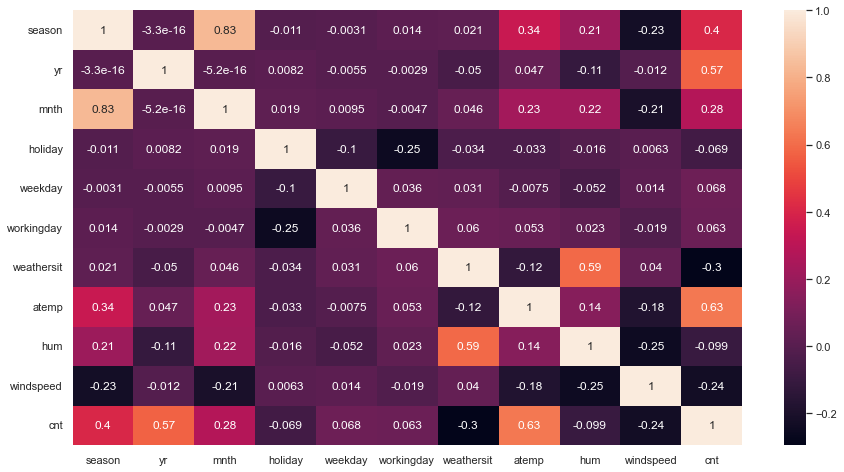

In [118]:
#now lets look at heat map if there is improvement.
sns.heatmap(bikesharing.corr(),annot=True)

#Highly correlated variables are removed now which is shown in above heatmap.

# Data Preparation

In [119]:
bikesharing.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801


In [120]:
#dropping dteday column as it is already split into multiple columns like season,year,weekday etc
bikesharing.drop(['dteday'],axis=1,inplace=True)

In [121]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [122]:
bikesharing_categorical=bikesharing[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']]
for col in bikesharing_categorical.columns:
    print(col,bikesharing[col].unique())

season [1 2 3 4]
yr [0 1]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]


In [123]:
for i in bikesharing_categorical.columns:
    bikesharing[i] = bikesharing[i].astype('object')

#For all the above specified numeric values of the categorical variables we need to hardcode the corresponding text


In [124]:
#The above dataframe shows about 7 columns that are categorical. So the values within each column needs be renamed and 
#then the dummy values needs to be created to pass on to the model 

bikesharing['season'] = bikesharing['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikesharing['yr'] = bikesharing['yr'].map({0:'2018',1:'2019'})
bikesharing['mnth'] = bikesharing['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                                       5:'May',6:'Jun',7:'Jul',8:'Aug',
                                       9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikesharing['holiday'] = bikesharing['holiday'].map({0:'No',1:'Yes'})

bikesharing['weekday'] = bikesharing['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bikesharing['workingday'] = bikesharing['workingday'].map({0:'No',1:'Yes'})
bikesharing['weathersit'] = bikesharing['weathersit'].map({1:"Clear",2:'Moderate',3:'LightRain',4:'HeavyRain'})


In [125]:
#creating dummy variables
dummyvariable = pd.get_dummies(bikesharing[list(bikesharing_categorical.columns)], drop_first=True)
dummyvariable.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_LightRain,weathersit_Moderate
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [126]:
dummyvariable.columns

Index(['season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_Yes',
       'weathersit_LightRain', 'weathersit_Moderate'],
      dtype='object')

In [127]:
#removing the actual columns and adding the dummy variable columns
bikesharing.drop(list(bikesharing_categorical.columns), axis=1, inplace = True)
bikesharing = pd.concat([bikesharing,dummyvariable], axis=1)

In [128]:
bikesharing.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_LightRain,weathersit_Moderate
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [129]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   atemp                 730 non-null    float64
 1   hum                   730 non-null    float64
 2   windspeed             730 non-null    float64
 3   cnt                   730 non-null    int64  
 4   season_spring         730 non-null    uint8  
 5   season_summer         730 non-null    uint8  
 6   season_winter         730 non-null    uint8  
 7   yr_2019               730 non-null    uint8  
 8   mnth_Aug              730 non-null    uint8  
 9   mnth_Dec              730 non-null    uint8  
 10  mnth_Feb              730 non-null    uint8  
 11  mnth_Jan              730 non-null    uint8  
 12  mnth_Jul              730 non-null    uint8  
 13  mnth_Jun              730 non-null    uint8  
 14  mnth_Mar              730 non-null    uint8  
 15  mnth_May              7

#Total of 29 columns are in the dataframe now.

# Split into Train-Test databases and perform Scaling


In [130]:
dftrain_bikesharing, dftest_bikesharing = train_test_split(bikesharing, train_size=0.70, random_state=100)

In [131]:
dftrain_bikesharing.shape

(510, 29)

In [132]:
dftest_bikesharing.shape

(220, 29)

In [133]:
dftrain_bikesharing.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'workingday_Yes', 'weathersit_LightRain', 'weathersit_Moderate'],
      dtype='object')

In [134]:
#scaling is to be done on all the numeric columns
sclr = MinMaxScaler()


In [135]:
bikesharing_numeric.drop(['temp', 'casual', 'registered'],axis=1,inplace=True)

In [136]:
#numeric columns are already defined at the start of the jupter notebook.Removing all dropped columns and keep only numeric columns
#bikesharing_numeric.drop(['temp','registered','casual'],axis=1,inplace=True)
dftrain_bikesharing[list(bikesharing_numeric.columns)] = sclr.fit_transform(dftrain_bikesharing[list(bikesharing_numeric.columns)])


C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [137]:
dftrain_bikesharing.describe()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_LightRain,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,...,0.025490,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.029412,0.345098
std,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,...,0.157763,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

#As shown above every numeric values is now scaled between 0 and 1

In [138]:
#create X and Y

y_train=dftrain_bikesharing.pop('cnt')
X_train=dftrain_bikesharing


In [139]:
X_train

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_LightRain,weathersit_Moderate
576,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.824359,0.679690,0.187140,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53,0.218747,0.435939,0.111379,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
350,0.223544,0.577930,0.431816,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
79,0.434043,0.759870,0.529881,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [140]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [141]:
y_train.shape

(510,)

In [142]:
X_train.shape

(510, 28)

In [143]:
# Passing the linear regression object to the RRFE function and ideally we consider 15 as the optimal number of features.
#X_train_lm=X_train.values.reshape(-1,1)
#y_train_lm=y_train.values.reshape(-1,1)

#X_test_lm=X_test.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [144]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 4),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 10),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 9),
 ('workingday_Yes', True, 1),
 ('weathersit_LightRain', True, 1),
 ('weathersit_Moderate', True, 1)]

In [145]:
#taking only the columns selected by RFE
rfecolumns = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfecolumns]
X_train_rfe.head()

,atemp,hum,windspeed,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Feb,mnth_Jan,mnth_Sep,holiday_Yes,weekday_Sun,workingday_Yes,weathersit_LightRain,weathersit_Moderate
576,0.766351,0.725633,0.264686,0,0,1,0,0,0,0,0,0,1,0,0
426,0.438975,0.640189,0.255342,0,0,1,0,0,0,0,0,1,0,0,1
728,0.200348,0.498067,0.663106,0,0,1,0,0,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,1,0,1,0,0,0,0,0,1,0,0,1
111,0.318819,0.751824,0.380981,1,0,0,0,0,0,0,0,0,1,0,1


In [146]:
len(X_train_rfe.columns)

15

Model 1

In [147]:
# using the stats model
# Adding constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.summary()

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.05e-188
Time:                        10:50:17   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2208      0.032      6.910      0.000       0.158       0.284
atemp                    0.5169      0.029     18.032      0.000       0.461       0.573
hum                     -0.1616      0.038     -4.292      0.000      -0.236      -0.088
windspeed               -0.1711      0.026     -6.622      0.000      -0.222      -0.120
season_summer            0.0877      0.012      7.252      0.000       0.064       0.111
season_winter            0.1226      0.013      9.467      0.000       0.097       0.148
yr_2019                  0.2311      0.008     28.495      0.000       0.215       0.247
mnth_Aug                 0.0606      0.016      3.727      0.000       0.029       0.093
mnth_Feb                -0.0278      0.020     -1.399      0.162      -0.067       0.011
mnth_Jan                -0.0535      0.020     -2.740      0.006      -0.092      -0.015
mnth_Sep                 0.1184      0.016      7.261      0.000       0.086       0.150
holiday_Yes             -0.0519      0.027     -1.900      0.058      -0.106       0.002
weekday_Sun              0.0515      0.015      3.491      0.001       0.023       0.080
workingday_Yes           0.0434      0.012      3.710      0.000       0.020       0.066
weathersit_LightRain    -0.2392      0.026     -9.062      0.000      -0.291      -0.187
weathersit_Moderate     -0.0570      0.011     -5.430      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       60.174   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.014
Skew:                          -0.595   Prob(JB):                     1.32e-34
Kurtosis:                       5.434   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My comments:
All the p-values are less than 0.05 threshold. So all seems to be significant. 
So check the VIF values

In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,22.78
0,atemp,13.21
12,workingday_Yes,5.15
2,windspeed,4.02
4,season_winter,2.41
3,season_summer,2.21
14,weathersit_Moderate,2.19
5,yr_2019,2.06
11,weekday_Sun,1.93
8,mnth_Jan,1.81


comments : All the features have a vif <5(i.e there is very less collinearity) which is usually taken as the cutoff
           Condsidering this model as final as all P-values <0.05 and vif <5 for all the independent variables is satisfying 

In [149]:
y_train_pred = lr1.predict(X_train_lm1)

#The above are the top 15 features chosen by RFE and ranking can be seen at the endfor each feature

In [150]:
# calculate residual
res = y_train - y_train_pred

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


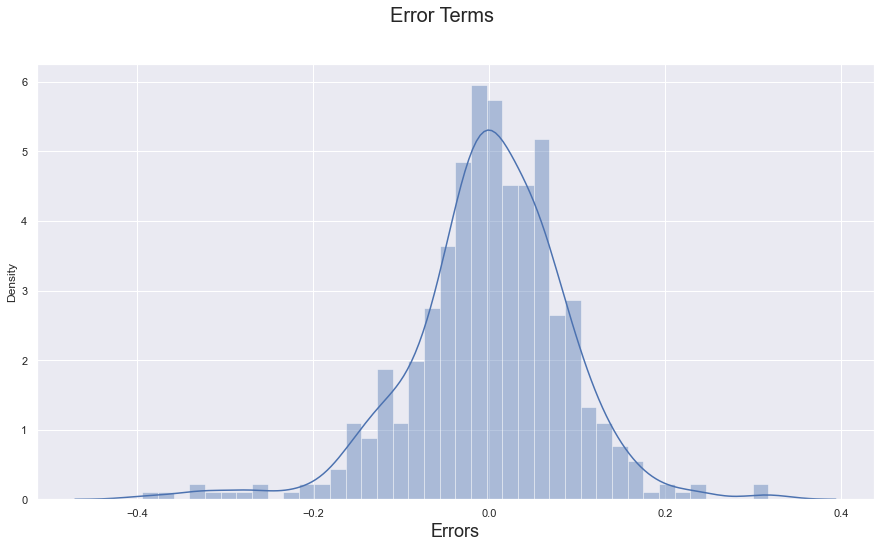

In [151]:
fig = plt.figure()
sns.distplot((res), bins = 40)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Making prediction on test dataset

In [152]:
# Do scaling on the numeric values of test dataset

dftest_bikesharing[list(bikesharing_numeric.columns)] = sclr.transform(dftest_bikesharing[list(bikesharing_numeric.columns)])
dftest_bikesharing.head()

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_LightRain,weathersit_Moderate
184,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
535,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
221,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
152,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [153]:
#split the x and y components
y_test = dftest_bikesharing.pop('cnt')
X_test = dftest_bikesharing

In [154]:
#take only the columns in the train dataset
X_test = X_test[list(X_train_rfe.columns)]

# Adding constant variable
X_test_lm = sm.add_constant(X_test)

C:\Users\LAKSHMAN\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [155]:
X_test.head(3)

,atemp,hum,windspeed,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Feb,mnth_Jan,mnth_Sep,holiday_Yes,weekday_Sun,workingday_Yes,weathersit_LightRain,weathersit_Moderate
184,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,1
535,0.842587,0.610133,0.153728,1,0,1,0,0,0,0,0,0,1,0,0
299,0.496145,0.837699,0.334206,0,1,0,0,0,0,0,0,0,1,0,1


In [156]:
#Making the predictions
y_test_pred = lr1.predict(X_test_lm)


Text(0, 0.5, 'y_test_pred')

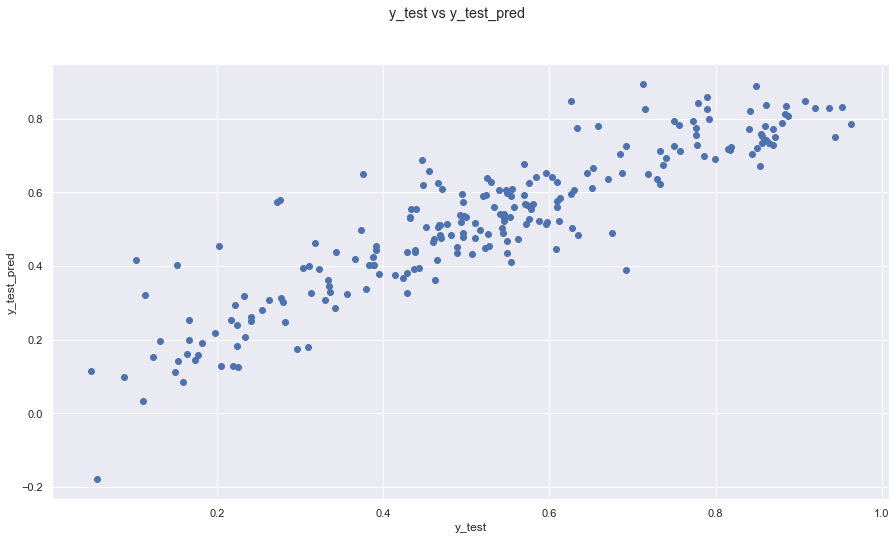

In [157]:
# Evaluating model
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred')              
plt.xlabel('y_test')                        
plt.ylabel('y_test_pred') 

The y_test and y_test pred are linearly related

In [158]:
#R-Sqaured values
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
#np.sqrt(mean_squared_error(y_test, y_pred))


In [159]:
y_train_pred

576    0.729014
426    0.526237
728    0.361637
482    0.622830
111    0.273013
         ...   
578    0.840306
53     0.260052
350    0.286173
79     0.305802
520    0.665549
Length: 510, dtype: float64

In [160]:
print("for test dataset",r2_test)
print("for train dataset",r2_train)

for test dataset 0.810576459181397
for train dataset 0.8434764651052324


In [161]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.810576459181397